# Preprocessing data
## Types
- <B>StandardScaler</B> in scikit-learn ensures that for each
feature the mean is 0 and the variance is 1, bringing all features to the same magni‐
tude. However, this scaling does not ensure any particular minimum and maximum
values for the features.

- <B>RobustScaler</B> works similarly to the StandardScaler in
that it ensures statistical properties for each feature that guarantee that they are on the
same scale. However, the RobustScaler uses the median and quartiles, 1 instead of
mean and variance. This makes the RobustScaler ignore data points that are very
different from the rest (like measurement errors). These odd data points are also
called outliers, and can lead to trouble for other scaling techniques.
- <B> MinMaxScaler</B> , on the other hand, shifts the data such that all features are exactly
between 0 and 1. For the two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis between 0 and 1
- <B> Normalizer</B>  It scales each data point such that the feature vector has a Euclidean length of 1. In other words, it projects a data point on the circle (or sphere, in the case of higher dimensions) with a radius of 1. This means every data point is scaled by a different number (by the inverse of its length). This normalization is often used when only the direction (or angle) of the data matters, not the length of the feature vector.

Pre‐processing methods like the scalers are usually applied before applying a supervised
machine learning algorithm

In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


we first import the class that imple‐
ments the preprocessing, and then instantiate it:

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

We then fit the scaler using the fit method, applied to the training data. For the Min
MaxScaler , the fit method computes the minimum and maximum value of each feature on the training set.

In [3]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

To apply the transformation that we just learned—that is, to actually scale the training
data—we use the transform method of the scaler. The transform method is used in
scikit-learn whenever a model returns a new representation of the data:


In [4]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


To apply the SVM to the scaled data, we also need to transform the test set. This is
again done by calling the transform method, this time on X_test :

In [5]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


MinMaxScaler (and all the other scalers) always
applies exactly the same transformation to the training and the test set. This means
the transform method always subtracts the training set minimum and divides by the
training set range, which might be different from the minimum and range for the test
set.
#### It is important to apply exactly the same transformation to the training set and the test set for the supervised model to work on the test set

# PCA
Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data. The directions found using this pro‐
cess are called <b>principal components</b>, as they are the main directions of variance in the
data. In general, there are as many principal components as original features.

## Applying PCA to the cancer dataset for visualization
One of the most common applications of PCA is visualizing high-dimensional data‐sets.
if we want to look at the Breast Cancer dataset,
even using a pair plot is tricky. This dataset has 30 features, which would result in
30 * 14 = 420 scatter plots! We’d never be able to look at all these plots in detail, let
alone try to understand them.
There is an even simpler visualization we can use, though—computing histograms of
each of the features for the two classes, benign and malignant cancer


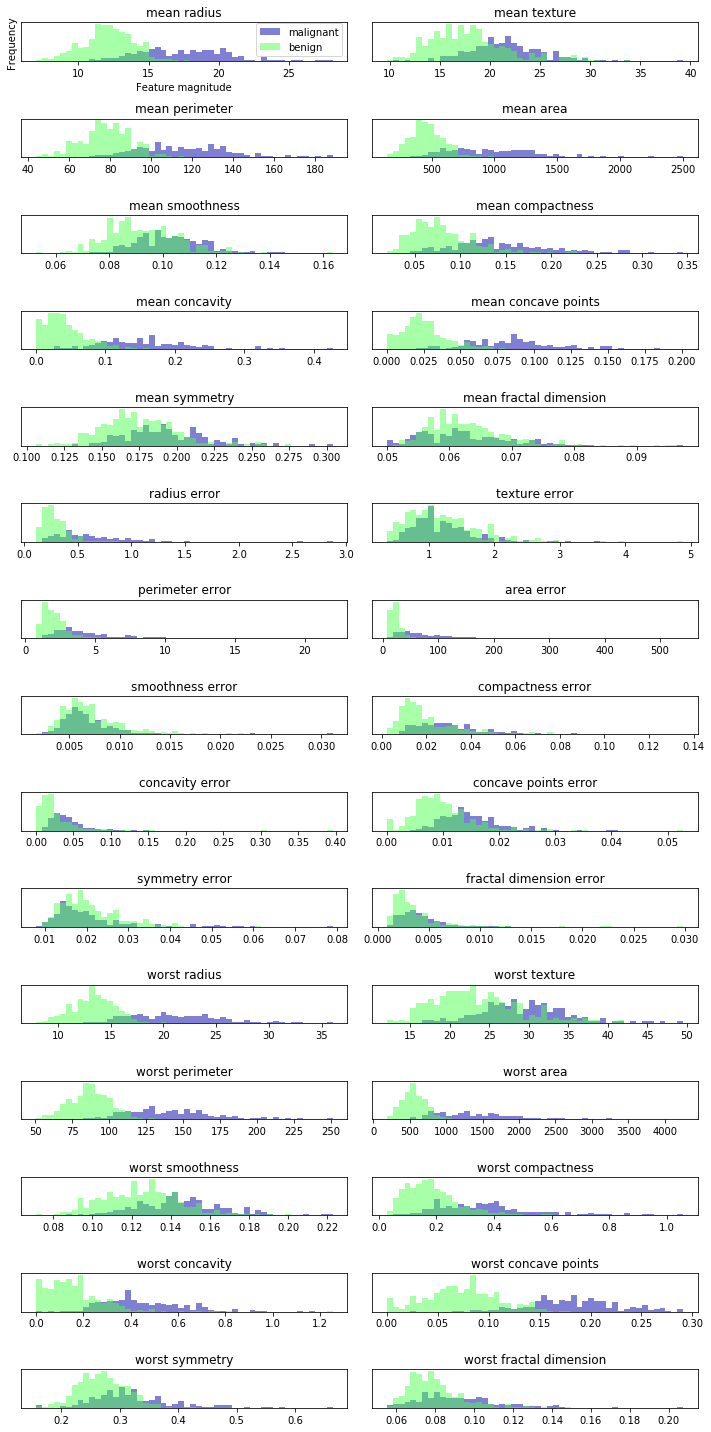

In [8]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    __, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Here we create a histogram for each of the features, counting how often a data point
appears with a feature in a certain range (called a bin). Each plot overlays two histo‐
grams, one for all of the points in the benign class (blue) and one for all the points in
the malignant class (red). This gives us some idea of how each feature is distributed
across the two classes, and allows us to venture a guess as to which features are better
at distinguishing malignant and benign samples. For example, the feature “smooth‐
ness error” seems quite uninformative, because the two histograms mostly overlap,
while the feature “worst concave points” seems quite informative, because the histo‐
grams are quite disjoint.

Using PCA, we can capture the main interactions
and get a slightly more complete picture. We can find the first two principal compo‐
nents, and visualize the data in this new two-dimensional space with a single scatter
plot.
Before we apply PCA, we scale our data so that each feature has unit variance using
StandardScaler :

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Learning the PCA transformation and applying it is as simple as applying a prepro‐
cessing transformation. We instantiate the PCA object, find the principal components
by calling the fit method, and then apply the rotation and dimensionality reduction
by calling transform . By default, PCA only rotates (and shifts) the data, but keeps all
principal components. To reduce the dimensionality of the data, we need to specify
how many components we want to keep when creating the PCA object:

In [10]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


We can now plot the first two principal components

Text(0,0.5,'Second principal component')

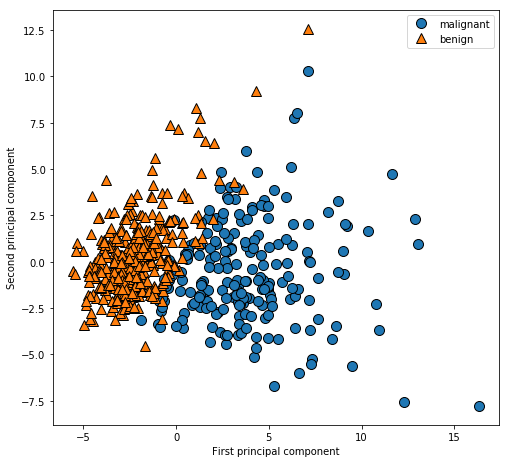

In [11]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

A downside of PCA is that the two axes in the plot are often not very easy to interpret.

In [29]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


Each row in components_ corresponds to one principal component, and they are sor‐
ted by their importance (the first principal component comes first, etc.). The columns
correspond to the original features attribute of the PCA in this example, “mean
radius,” “mean texture,” and so on. Let’s have a look at the content of components_ :

In [30]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


We can also visualize the coefficients using a heat map, which might be
easier to understand:

Text(0,0.5,'Principal components')

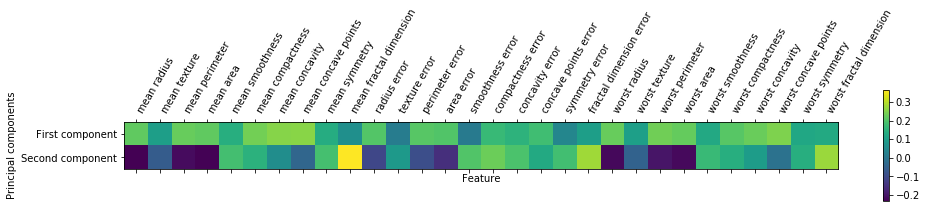

In [12]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

You can see that in the first component, all features have the same sign (it’s negative,
but as we mentioned earlier, it doesn’t matter which direction the arrow points in).
That means that there is a general correlation between all features. As one measure‐
ment is high, the others are likely to be high as well. The second component has
mixed signs, and both of the components involve all of the 30 features. This mixing of
all features is what makes explaining the axes in Figure 3-6 so tricky.

### Eigenfaces for feature extraction

Another application of PCA is feature extraction. The idea
behind feature extraction is that it is possible to find a representation of your data
that is better suited to analysis than the raw representation you were given. A great
example of an application where feature extraction is helpful is with images. Images
are made up of pixels, usually stored as red, green, and blue (RGB) intensities.
Objects in images are usually made up of thousands of pixels, and only together are
they meaningful.
We will give a very simple application of feature extraction on images using PCA, by
working with face images from the Labeled Faces in the Wild dataset. This dataset
contains face images of celebrities downloaded from the Internet, and it includes
faces of politicians, singers, actors, and athletes from the early 2000s. We use gray‐
scale versions of these images, and scale them down for faster processing

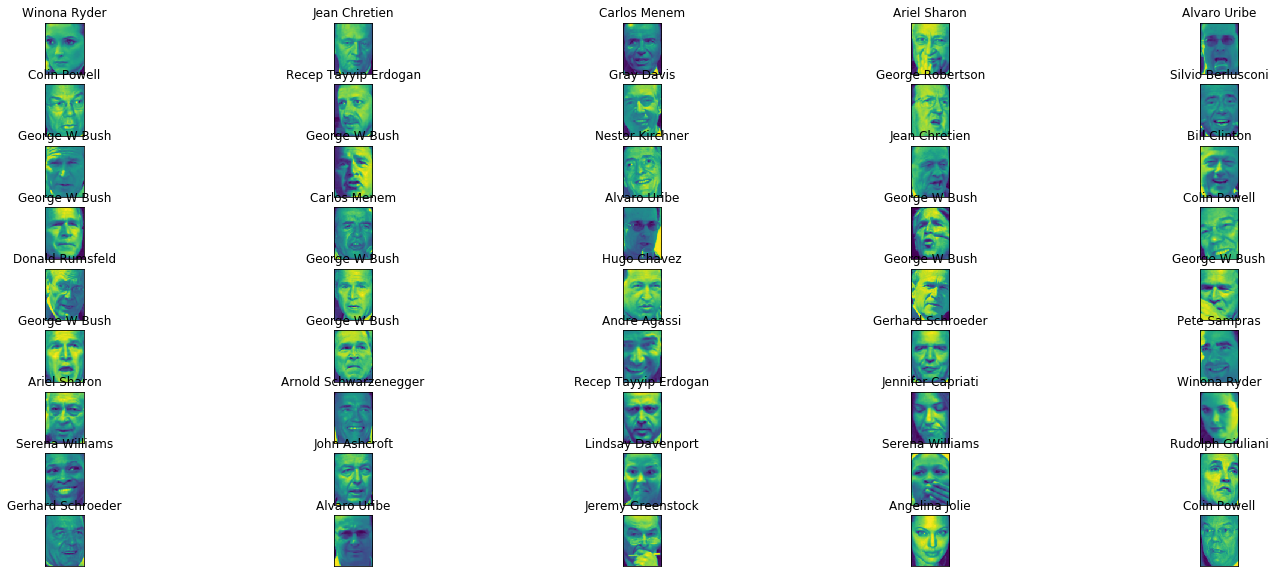

In [21]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(9, 5, figsize=(25,10),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [14]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [15]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39Alvaro Uribe               35Amelie Mauresmo            21
Andre Agassi               36Angelina Jolie             20Ariel Sharon               77
Arnold Schwarzenegger      42Atal Bihari Vajpayee       24Bill Clinton               29
Carlos Menem               21Colin Powell              236David Beckham              31
Donald Rumsfeld           121George Robertson           22George W Bush             530
Gerhard Schroeder         109Gloria Macapagal Arroyo    44Gray Davis                 26
Guillermo Coria            30Hamid Karzai               22Hans Blix                  39
Hugo Chavez                71Igor Ivanov                20Jack Straw                 28
Jacques Chirac             52Jean Chretien              55Jennifer Aniston           21
Jennifer Capriati          42Jennifer Lopez             21Jeremy Greenstock          24
Jiang Zemin                20John Ashcroft              53John Negroponte            31
Jose Maria Aznar           23Jua

To make the data less skewed, we will only take up to 50 images of each person

In [23]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

A common task in face recognition is to ask if a previously unseen face belongs to a
known person from a database. This has applications in photo collection, social
media, and security applications. One way to solve this problem would be to build a
classifier where each person is a separate class. However, there are usually many different people in face databases, and very few images of the same person (i.e., very few
training examples per class). That makes it hard to train most classifiers.

A simple solution is to use a one-nearest-neighbor classifier that looks for the most
similar face image to the face you are classifying. This classifier could in principle
work with only a single training example per class. Let’s take a look at how well
KNeighborsClassifier does here:

In [26]:
from sklearn.neighbors import KNeighborsClassifier
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


We obtain an accuracy of 26.6%, which is not actually that bad for a 62-class classifi‐
cation problem (random guessing would give you around 1/62 = 1.5% accuracy), but
is also not great. We only correctly identify a person every fourth time.

This is where PCA comes in. Computing distances in the original pixel space is quite
a bad way to measure similarity between faces. When using a pixel representation to
compare two images, we compare the grayscale value of each individual pixel to the
value of the pixel in the corresponding position in the other image. This representa‐
tion is quite different from how humans would interpret the image of a face, and it is
hard to capture the facial features using this raw representation. For example, using
pixel distances means that shifting a face by one pixel to the right corresponds to a
drastic change, with a completely different representation. We hope that using distances along principal components can improve our accuracy. Here, we enable the
whitening option of PCA, which rescales the principal components to have the same
scale. This is the same as using StandardScaler after the transformation. Reusing the
data from brfore, whitening corresponds to not only rotating the data, but
also rescaling it so that the center panel is a circle instead of an ellipse

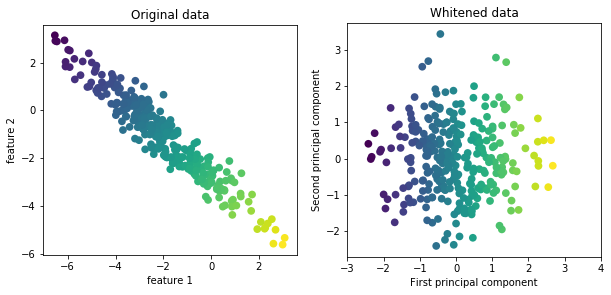

In [43]:
mglearn.plots.plot_pca_whitening()

We fit the PCA object to the training data and extract the first 100 principal compo‐
nents. Then we transform the training and test data:

In [45]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

ValueError: n_components=100 must be between 0 and n_features=30 with svd_solver='full'

The new data has 100 features, the first 100 principal components. Now, we can use
the new representation to classify our images using a one-nearest-neighbors classifier:

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

NameError: name 'X_train_pca' is not defined

Our accuracy improved quite significantly, from 26.6% to 35.7%, confirming our
intuition that the principal components might provide a better representation of the
data.

In [47]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (2, 30)
